# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [4]:
df = pd.read_excel("data.xlsx")

Display the first 5 rows of the dataset using `.head()`

In [5]:
# put your answer here
df.head()

,Name,PostShareFrequently,Active,RepliesToComments,FriendsFollowers,Personality
0,Lovely,0,1,1,357,0
1,Danielle,0,0,0,996,0
2,Lawrence,0,1,1,568,0
3,Dan Fred,1,1,0,250,0
4,Emil,1,1,1,3700,0


Display the summary of all the features of the dataset using `.info()`

In [6]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 100 non-null    object
 1   PostShareFrequently  100 non-null    int64 
 2   Active               100 non-null    int64 
 3   RepliesToComments    100 non-null    int64 
 4   FriendsFollowers     100 non-null    int64 
 5   Personality          100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [7]:
# put your answer here
df["Personality"].value_counts()

,count
Personality,
1,57
0,43


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

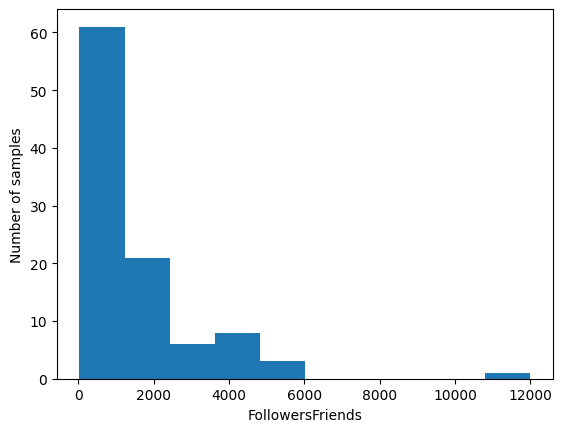

In [8]:
plt.hist(df["FriendsFollowers"])
plt.xlabel("FollowersFriends")
plt.ylabel("Number of samples")
plt.show()

Remove the name column using `drop()` method

In [9]:
df.drop(columns="Name", inplace=True)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [10]:
X = df[["PostShareFrequently", "Active", "RepliesToComments", "FriendsFollowers"]].values

X

array([[    0,     1,     1,   357],
       [    0,     0,     0,   996],
       [    0,     1,     1,   568],
       [    1,     1,     0,   250],
       [    1,     1,     1,  3700],
       [    0,     1,     0,   871],
       [    0,     1,     1,   110],
       [    1,     1,     1,   885],
       [    1,     1,     1,   428],
       [    0,     0,     0,   373],
       [    0,     0,     0,   288],
       [    0,     0,     0,   337],
       [    0,     1,     1,   342],
       [    1,     1,     1,  1100],
       [    1,     1,     1,  2500],
       [    1,     1,     1,  1100],
       [    0,     1,     0,  1700],
       [    0,     1,     0,  1400],
       [    1,     1,     0,   295],
       [    1,     1,     1,  1900],
       [    1,     1,     1,  2100],
       [    0,     1,     0,  2300],
       [    1,     1,     0,  1800],
       [    0,     1,     0,  1200],
       [    1,     1,     1,  1400],
       [    0,     1,     0,   768],
       [    1,     1,     1,   967],
 

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [11]:
y = df["Personality"].values
y

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [12]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Display the dimensions of each variables using `.shape()`

In [13]:
# put your answer here
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 4)
(20, 4)
(80,)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [14]:
knn = KNeighborsClassifier(n_neighbors=23)

Train the model using the `.fit()`

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

Test the model using the `.predict()`

In [16]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

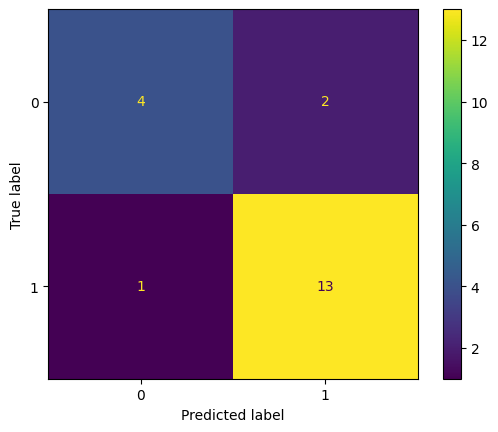

In [17]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [18]:
accuracy_score(y_test, y_pred)

0.85

Display the precision

In [19]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.66666667 0.92857143]


Display the recall

In [20]:
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.8        0.86666667]


Display the f1-score

In [21]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.72727273 0.89655172]


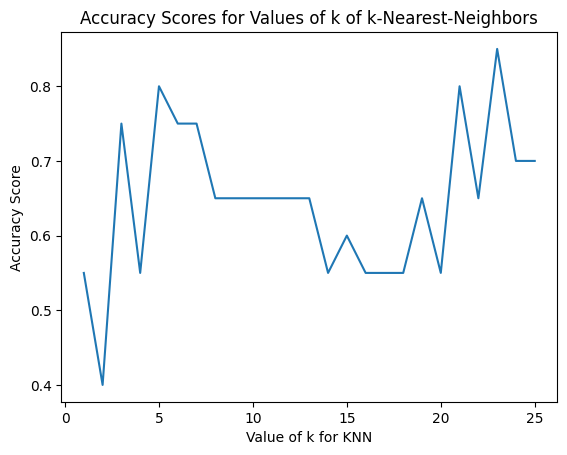

In [22]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [23]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[0, 1, 0, 78]])

array([0])